# Back Propagation

- At the end of forward propagation, the loss function computes how close the predicted output is to the expected output
- We want to see how each weight and bias in the hidden layers affect the loss
- We do this by computing the gradient of the loss function, i.e) finding the derivative wrt every weight/bias
- This is done using the chain rule

## Chain Rule
- Functions within functions, ex) y = f(g(x)), to find the derivative of y wrt x, need to first find derivative of y wrt g(x), then multiply by derivative of g(x) wrt x
- Partial derivatives with chain rule ex) y= f(g(x,z)) to find deriv of y wrt z, first find deriv of y wrt g, then partial deriv of g wrt z
- A neural network is just a series of many functions. So the final loss function is dependent on many functions, themselves dependent on functions
- To determine the impact of a particular weight on the loss, need to take derivative of loss wrt to the output activation function times deriv of activation function wrt the weighted sum of inputs\*weights+bias, times the deriv of the sum function wrt a multiplication of weight*input, and keep going until reaching the layer with the weight you are interested in 

In [455]:
# ILLUSTRATING CHAIN RULE WITH RELU FUNCTION
# want to minimize output of a ReLU function. compute the gradient to determine the 
# impact of each input variable to the function
# input variables are the actual inputs, weights, and bias
# each neuron performs a series of elementary functions (multiplication, sum), so to get the 
# gradient of a ReLU function, need to use chain rule 

# simulate the forward pass w/ ReLU function as a series of smaller functions
# one neuron with 3 inputs
x = [1.0, -2.0, 3.0] #input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 #bias

# first layer of functions, the inputs times the weights
xw0 = x[0]*w[0]
xw1 = x[1]*w[1]
xw2 = x[2]*w[2]

# second layer of functions, adding weighted inputs and bias
z = xw0+xw1+xw2+b

# third layer of functions, the ReLU function itself
y = max(z, 0)
print(y)

# let's say we want to determine the impact that a specific weight ex. x0 has on the output of ReLU 
# need to first do deriv of ReLU w/ respect to the cumulative sum function
# times the deriv of the sum wrt the mult function mult(x0, w0)
# times the deriv of the mult function wrt x0

6.0


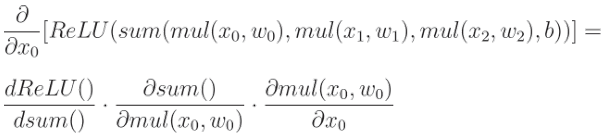

- During backward propagation, calculate derivative of loss function and multiply by derivative of activation function of output layer, multiply by the derivative of the output layer, etc and keep going back layers
- Inside the layers, the derivative wrt the weights and biases of the layer will form the **gradient** that determines the impact of those weights and biases on the loss, which informs how they will be updated
- The derivative wrt the inputs are chained back to the previous layer

In [456]:
# backward pass
dvalue = 1.0 # derivative from the next layer

# derivative of ReLU function is 1 if z>0, and 0 if z<0 where z is the input to the function i.e) the sum function
drelu_dz = dvalue * (1.0 if z > 0 else 0.0)

# go one step further by finding partial derivative of the ReLU wrt the weighted inputs wx and bias b
# multiply drelu_dz by the partial derivative of the sum function wrt weighted inputs and bias
# these derivative are just 1 
dsum_dxw0 = 1
drelu_dxw0 = drelu_dz * dsum_dxw0
print(drelu_dxw0)

# one step further, multiply drelu_dxw0 by the derivative of the product function i.e) xw0=x0*w0
# the derivative of this wrt x0 is w0
dmul_dx0 = w[0]
drelu_dx0 = drelu_dxw0 * dmul_dx0

# in total, to get the partial derivative of ReLU wrt the first input x0, this is what we had to do:
drelu_dx0 = dvalue * (1.0 if z > 0 else 0.0) * 1.0 * w[0]
print(drelu_dx0)


1.0
-3.0


In [457]:
# calculate the partial derivatives wrt every input, weight, and bias
# Forward pass 
x = [1.0, -2.0, 3.0]  # input values 
w = [-3.0, -1.0, 2.0]  # weights 
b = 1.0  # bias 
# Multiplying inputs by weights 
xw0 = x[0] * w[0] 
xw1 = x[1] * w[1] 
xw2 = x[2] * w[2] 
# Adding weighted inputs and a bias 
z = xw0 + xw1 + xw2 + b 
# ReLU activation function 
y = max(z, 0) 
# Backward pass
# The derivative from the next layer 
dvalue = 1.0 
# Derivative of ReLU and the chain rule 
drelu_dz = dvalue * (1. if z > 0 else 0.) 
print(drelu_dz) 
# Partial derivatives of the multiplication, the chain rule 
dsum_dxw0 = 1 
dsum_dxw1 = 1 
dsum_dxw2 = 1 
dsum_db = 1 
drelu_dxw0 = drelu_dz * dsum_dxw0 
drelu_dxw1 = drelu_dz * dsum_dxw1 
drelu_dxw2 = drelu_dz * dsum_dxw2 
drelu_db = drelu_dz * dsum_db 
print(drelu_dxw0, drelu_dxw1, drelu_dxw2, drelu_db) 
# Partial derivatives of the multiplication, the chain rule 
# Partial derivatives of the multiplication, the chain rule 
dmul_dx0 = w[0] 
dmul_dx1 = w[1] 
dmul_dx2 = w[2] 
dmul_dw0 = x[0] 
dmul_dw1 = x[1] 
dmul_dw2 = x[2] 
drelu_dx0 = drelu_dxw0 * dmul_dx0 
drelu_dw0 = drelu_dxw0 * dmul_dw0 
drelu_dx1 = drelu_dxw1 * dmul_dx1 
drelu_dw1 = drelu_dxw1 * dmul_dw1 
drelu_dx2 = drelu_dxw2 * dmul_dx2 
drelu_dw2 = drelu_dxw2 * dmul_dw2 
print(drelu_dx0, drelu_dw0, drelu_dx1, drelu_dw1, drelu_dx2, drelu_dw2)


1.0
1.0 1.0 1.0 1.0
-3.0 1.0 -1.0 -2.0 2.0 3.0


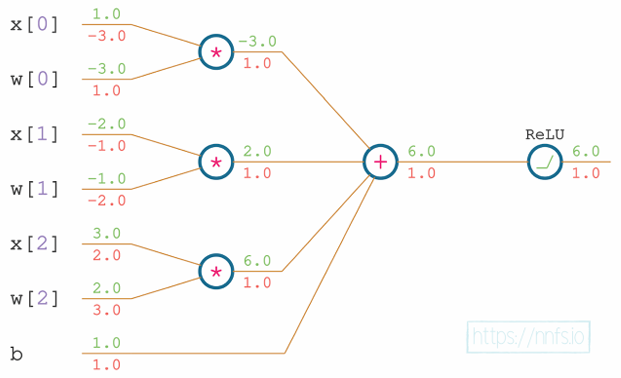

In [458]:
# the gradient of this ReLU function for the single neuron can be represented using 3 vectors
dx = [drelu_dx0, drelu_dx1, drelu_dx2]  # gradients on inputs 
dw = [drelu_dw0, drelu_dw1, drelu_dw2]  # gradients on weights 
db = drelu_db  # gradient on bias

## Back Propagation with Layers
- Now let's see how to do the back propagation with layers of neurons rather than a single neuron
- Consider a network which has 3 sample sets of inputs (batch of 3), each sample has 4 features (4 input neurons), a single hidden layer containing 3 neurons (list of 3 weights and 3 biases), and 3 neurons in the next layer
- Each neuron in the current layer is connected to 3 neurons in the next layer. Each of the 3 neurons in the next layer passes back a derivative
- Each neuron in current layer needs to have a singular dvalue to use in chain rule. Therefore, sum the derivatives from the 3 neurons in the next layer to get the dvalue of the current layer neurons
- In the example below, consider dvalue as 1 for all current neurons, so we can represent the derivatives passed to the current neurons in a vector size 3
- For each neuron in current layer, to get the derivative with respect to an input (recall there are 4 inputs), the partial derivative is just the weight associated with that input
- So the partial derivative wrt input array is just the weights array 
- Recall weights array is transposed to be size inputs*neurons. 

In [459]:
import numpy as np 
 
# Passed in gradient from the next layer 
# for the purpose of this example we're going to use 
# a vector of 1s. note that there are double bracket [[]] so that dvalues[0]=[1,1,1]
dvalues = np.array([[1., 1., 1.]]) 
 
# We have 3 sets of weights - one set for each neuron 
# we have 4 inputs, thus 4 weights 
# recall that we keep weights transposed 
weights = np.array([[0.2, 0.8, -0.5, 1], 
                    [0.5, -0.91, 0.26, -0.5], 
                    [-0.26, -0.27, 0.17, 0.87]]).T 
 
# sum weights of given input 
# and multiply by the passed in gradient for this neuron 
dx0 = sum(weights[0]*dvalues[0]) 
dx1 = sum(weights[1]*dvalues[0]) 
dx2 = sum(weights[2]*dvalues[0]) 
dx3 = sum(weights[3]*dvalues[0]) 
 
dinputs = np.array([dx0, dx1, dx2, dx3]) 
 
print(dinputs)

# or alternatively do the dot product
dinputs = np.dot(weights, dvalues[0])
print(dinputs)

# alternatively swap the positions of dvalues and weights, but need to transpose weights to match the shape
dinputs = np.dot(dvalues[0], weights.T)
print(dinputs)

[ 0.44 -0.38 -0.07  1.37]
[ 0.44 -0.38 -0.07  1.37]
[ 0.44 -0.38 -0.07  1.37]


In [460]:
# to handle batches of inputs, dvalues because an array where each row represents the derivatives from the upstream layer associated with a sample set

import numpy as np

dvalues = np.array([[1,1,1],
                    [2,2,2],
                    [3,3,3]])

weights = np.array([[0.2, 0.8, -0.5, 1], 
                    [0.5, -0.91, 0.26, -0.5], 
                    [-0.26, -0.27, 0.17, 0.87]]).T 

# we want the output to be of size samples*inputs, therefore we need to do dvalues dot weights.T, rather than weights dot dvalues
dinputs = np.dot(dvalues, weights.T)
print(dinputs)

[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


- Calculating gradient wrt weights is similar but we need to match the shape of the weights rather than the inputs since we use the dweights to update the weights
- Notice that dinputs shape changes based on the number of sample sets in the batch, i.e) the number of rows equals the number of sample sets
- For dweights, the **shape is always the same** and is equal to the **shape of the weights array** (# of input features by # neurons in current layer)
- If we have a batch of samples, instead of updating the size of the dweights, we average the gradients across all the samples in the batch

In [461]:
import numpy as np 
 
# Passed in gradient from the next layer 
# for the purpose of this example we're going to use 
# an array of an incremental gradient values 
# dvalues is shape (# samples x # current neurons)
dvalues = np.array([[1., 1., 1.], 
                    [2., 2., 2.], 
                    [3., 3., 3.]]) 
 
# We have 3 sets of inputs - samples 
# shape is (# samples x # input features)
inputs = np.array([[1, 2, 3, 2.5], 
                   [2., 5., -1., 2], 
                   [-1.5, 2.7, 3.3, -0.8]]) 
 
# sum weights of given input (or average them)
# and multiply by the passed in gradient for this neuron 
# by doing (# input features x # samples) dot (# samples x # current neurons), we get a resulting matrix of shape (# input features x # current neurons), which is the shape of the weights matrix
dweights = np.dot(inputs.T, dvalues) 
 
print(dweights) 

[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]


In [462]:
# we can then use the dweights matrix to update the values of the weights matrix by some fraction
weights = np.array([[0.2, 0.8, -0.5, 1], 
                    [0.5, -0.91, 0.26, -0.5], 
                    [-0.26, -0.27, 0.17, 0.87]]).T 

weights += -0.001 * dweights
# note that negative is applied, because for positive values in the dweights matrix indicates a positive increase in weight leads to positive increase in cost, we want to negate that effect

In [463]:
# for the derivatives wrt bias, we need the dbiases to be the same shape as biases, which for a layer is a 1xneurons shape
# recall derivative of the sum function wrt bias is 1, so the dbiases is therefore the sum over samples for each neuron
dvalues = np.array([[1., 1., 1.], 
                    [2., 2., 2.], 
                    [3., 3., 3.]]) 

biases = np.array([[2, 3, 0.5]])

# for each neuron, sum each sample (sum down the columns)
dbiases = np.sum(dvalues, axis=0, keepdims=True)
print(dbiases)

[[6. 6. 6.]]


In [464]:
# now we need to do the derivative of the ReLU function, which we should have been multiplying dbiases, dweights, and dbiases by
# the value of the derivative of ReLU depends on the value of the inputs to the function. let z be the layer "outputs" before passing through the activation function (have just went through sum)
z = np.array([[1, 2, -3, -4], 
              [2, -7, -1, 3], 
              [-1, 2, 5, -1]]) 
 
# for all indices where z is greater than 0, the derivative is 1 (since ReLU passes through linearly for z > 0 but set to 0 for z < 0)
drelu = np.zeros_like(z)
drelu[z > 0] = 1

# then by chain rule we multiply drelu by dvalues, before passing that back to get dweights and dinputs and dbiases
# example dvalues:
dvalues = np.array([[1, 2, 3, 4], 
                    [5, 6, 7, 8], 
                    [9, 10, 11, 12]])

drelu *= dvalues
print(drelu)

# or a simpler way to write this is rather than making a drelu array before multiplying by dvalues, just copy dvalues directly and set the values to zero wherever z <= 0

drelu = dvalues.copy()
drelu[z <= 0] = 0
print(drelu)

[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]
[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]


In [465]:
# combining everything for a hidden layer neuron, assuming we have a batched dvalues passed back
# do the forward and backward pass

import numpy as np

dvalues = np.array([[1., 1., 1.], 
                    [2., 2., 2.], 
                    [3., 3., 3.]]) 
 
# We have 3 sets of inputs - samples 
# shape is (# samples x # input features)
inputs = np.array([[1, 2, 3, 2.5], 
                   [2., 5., -1., 2], 
                   [-1.5, 2.7, 3.3, -0.8]]) 
# We have 3 sets of weights - one set for each neuron 
# we have 4 inputs, thus 4 weights 
# recall that we keep weights transposed 
# weights is shape (# current neurons x # input features), and after transpose is (# input features x # current neurons)
weights = np.array([[0.2, 0.8, -0.5, 1], 
                    [0.5, -0.91, 0.26, -0.5], 
                    [-0.26, -0.27, 0.17, 0.87]]).T 

# One bias for each neuron 
# biases are the row vector with a shape (1, neurons) 
biases = np.array([[2, 3, 0.5]])

# forward pass
# the size of layer_outputs is (# inputs x # current neurons)
layer_outputs = np.dot(inputs, weights) + biases
relu_outputs = np.maximum(0, layer_outputs)

# now simulate the backward pass assuming dvalues is being passed back
# drelu is shape (# samples x # current neurons)
drelu = dvalues.copy()
drelu[layer_outputs <= 0] = 0

# shape (# samples x # input features)
dinputs = np.dot(drelu, weights.T)
# shape (# input features x # current neurons)
dweights = np.dot(inputs.T, drelu)
# shape (1 x # current neurons)
dbiases = np.sum(drelu, axis=0, keepdims=True)

# now update the parameters using some fraction of the gradient
weights += -0.001 * dweights
biases += -0.001 * dbiases

print(weights)
print(biases)

[[ 0.1995  0.5035 -0.2605]
 [ 0.7799 -0.9201 -0.2901]
 [-0.5109  0.2471  0.1591]
 [ 0.9959 -0.5001  0.8659]]
[[1.994 2.996 0.494]]


## Derivative of Cross-Entropy Loss Function

- The derivative of the cross-entropy loss function wrt predicted inputs for a given sample is the negative ratio of the ground-truth vector (one-hot encoded) by the prediction vector
- ex) ground-truth = [1, 0, 0], prediction = [0.8, 0.1, 0.1]

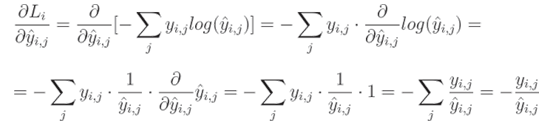

- for a batch of samples, the size of the partial derivative over all the samples will be (# samples x # output neurons)


In [466]:
# if dvalues is the output of the softmax function and y_true is one-hot encoded vector of the true solution
# then the derivative of the loss function is just -y_true divided by dvalues

dvalues = np.array([[0.8, 0.1, 0.1],
           [0.6, 0.3, 0.1],
           [0.2, 0.5, 0.3]])

y_true = np.array([[1, 0, 0],
          [0, 1, 0],
          [0, 1, 0]])

dinputs = -y_true / dvalues

# also normalize by the number of samples. When we calculate dweights and dbiases later on, we do a sum over the number of samples
# more samples leads to higher dweights and dbiases, which means the amount we tweak weights and biases will be affected by the number of samples
# so in this step, normalize the gradients to make the amount of tweak independent of the number of samples
dinputs = dinputs / 3
print(dinputs)

[[-0.41666667  0.          0.        ]
 [ 0.         -1.11111111  0.        ]
 [ 0.         -0.66666667  0.        ]]


## Derivative of Softmax Activation Function

- Recall the softmax function is defined as below
- Sij is the jth softmax output of the ith sample, z

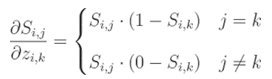

- or using the Kronecker delta, which equals 1 for j=k and 0 for all else

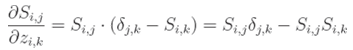

- The shape of this will be a square, #outputsx#outputs
- Consider if we have 3 output neurons
- The first part with the kronecker delta results in a diagonal matrix, where $S_{i,j}$ are on the diagonal (the 3 outputs of the softmax function for the whole layer)
- The second part is essentially the softmax output times the softmax output
- The resulting square matrix is the **Jacobian**, an array of partial derivatives of the 3 output neurons with respect to every input to those neurons, resulting in a 3x3 matrix
- Notice that the derivatives are being computed on a sample-wise basis
- Therefore if you have n samples, need to do this n times, resulting in a list of Jacobian matrices that is n elements long

In [467]:
# consider a single sample
softmax_output = [0.7, 0.1, 0.2]
# reshape as a list of list
softmax_output = np.array(softmax_output).reshape(-1,1)

first = np.diagflat(softmax_output)
second = np.dot(softmax_output, softmax_output.T)

jacobian = first - second

# for each sample, after computing the jacobian, need to dot product with the dvalues
# dvalues will be of shape (#samples x #output neurons)
# so for a sample-wise basis, index through the dvalues to get a vector (1x#outputneurons) and then do the dot product, resulting in a vector (1x#outputneurons) since jacobian is (#outputneuronsx#outputneurons)
dvalues_single = [0.2, 0.3, 0.2]

dinput_sample = np.dot(jacobian, dvalues_single)


- The jacobian represents how sensitive the output of the softmax function is to its inputs (the weighted sums coming out of the output neurons)
- Remember, the order of the functions goes weighted sum -> softmax -> loss, and the number of functions is always equal to # output neurons

## Common Loss and Softmax Derivative

- Rather than computing the derivatives separately (derivative of loss wrt. softmax outputs, times deriv of softmax wrt softmax inputs), they can be computed directly (deriv of loss wrt softmax inputs)
- This actually results in a very simple implementation. It is just the subtraction of the predicted and ground truth values

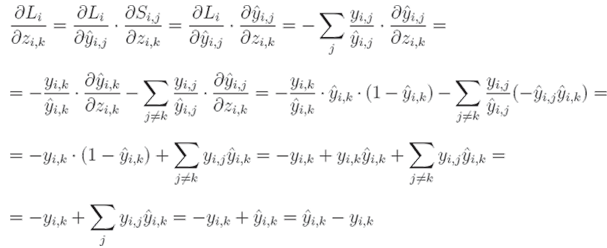